<a id='top-page'></a>
# <img src="../images/PCAfold-logo.svg" style="height:100px"> Demo for data manipulation

In this tutorial, we present the data manipulation functionalities from the `preprocess` module.

- [**Centering and scaling data sets**](#centering_and_scaling)
- [**Conditional statistics**](#conditional_statistics)
- [**Multivariate outlier detection from data sets**](#outlier_detection)
- [**Kernel density weighting of data sets**](#kernel_density)
- [**References**](#references)
***

**Should plots be saved?**

In [1]:
save_plots = False

***

We import the necessary modules:

In [1]:
from PCAfold import preprocess
from PCAfold import PreProcessing
from PCAfold import KernelDensity
from PCAfold import PCA
from PCAfold import reduction
import numpy as np

and we set some initial parameters:

In [ ]:
save_filename = None

***
<a id='centering_and_scaling'></a>
## Centering and scaling and constant variable removal

[**↑ Go to the top**](#top-page)

We begin by generating a dummy data set:

In [3]:
X = np.random.rand(100,20)

Centering and scaling can be performed in the following way:

In [4]:
(X_cs, X_center, X_scale) = preprocess.center_scale(X, 'range', nocenter=False)

Uncentering and unscaling can be performed in the following way to get back the original data set:

In [5]:
X = preprocess.invert_center_scale(X_cs, X_center, X_scale)

If constant variables are present in the data set, they can be removed using `preprocess.remove_constant_vars` function which can be a useful pre-processing before PCA is applied on a data set. Below we inject an artificial constant column to the dummy data set:

In [6]:
X[:,5] = np.ones((100,))

it can be removed by:

In [7]:
(X_removed, idx_removed, idx_retained) = preprocess.remove_constant_vars(X)

Indices of any removed columns are stored in the `idx_removed` vector:

In [8]:
idx_removed

[5]

In addition to that, an object of the `PreProcessing` class can be created and used to store the combination of the above pre-processing:

In [9]:
preprocessed = preprocess.PreProcessing(X, 'range', nocenter=False)

Centered and scaled data set can then be accessed as class attribute:

In [10]:
preprocessed.X_cs

array([[-0.15654091, -0.37212698,  0.38672629, ...,  0.23893649,
         0.51089257,  0.02188308],
       [ 0.41316424, -0.03686944,  0.38307103, ..., -0.30012026,
         0.3389187 , -0.3367966 ],
       [ 0.33459461,  0.53180626,  0.2163569 , ..., -0.45601818,
        -0.36504325, -0.13450365],
       ...,
       [ 0.29096392,  0.07101066,  0.14439227, ..., -0.08368197,
        -0.46029493, -0.0734818 ],
       [-0.10471766,  0.34820547,  0.44079217, ..., -0.29132478,
        -0.15659234,  0.34811255],
       [ 0.12793245, -0.05081945, -0.00076721, ...,  0.26330506,
        -0.08429853,  0.32554871]])

as well as the corresponding centers and scales:

In [11]:
preprocessed.X_center

array([0.52152694, 0.46655288, 0.54612562, 0.54176013, 0.53411913,
       0.50344096, 0.48603845, 0.53015494, 0.48630057, 0.51044199,
       0.51507526, 0.48930691, 0.49713217, 0.51755635, 0.48937267,
       0.49809326, 0.45328941, 0.46496419, 0.48054305])

In [12]:
preprocessed.X_scale

array([0.97152792, 0.995605  , 0.96951166, 0.9791997 , 0.98461251,
       0.98490744, 0.98323873, 0.94869485, 0.99849911, 0.98419818,
       0.97767586, 0.97751955, 0.98664413, 0.94960715, 0.99135757,
       0.98741746, 0.98938449, 0.99234833, 0.97350466])

***
<a id='conditional_statistics'></a>
## Conditional statistics

[**↑ Go to the top**](#top-page)

In this section, we demonstrate how conditional statistics can be computed and plotted for the original data set. A data set representing combustion of syngas in air generated from steady laminar flamelet model using [*Spitfire*](https://github.com/sandialabs/Spitfire) software [[1]](#references) and a chemical mechanism by Hawkes et al. [[2]](#references) is used as a demo data set. We begin by importing the data set composed of the original state space variables, $\mathbf{X}$, and the corresponding mixture fraction observations, $Z$, that will serve as the conditioning variable:

In [13]:
X = np.genfromtxt('data-state-space.csv', delimiter=',')
Z = np.genfromtxt('data-mixture-fraction.csv', delimiter=',')

First, we create an object of the `ConditionalStatistics` class. We condition the entire data set $\mathbf{X}$, using the mixture fraction as a conditioning variable. We compute the conditional stastics in 20 bins of the conditioning variable:

In [14]:
cond = preprocess.ConditionalStatistics(X, Z, k=20)

We can then retrieve the centroids for which the conditional statistics

In [15]:
cond.centroids

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

and retrieve different conditional statistics. For instance, the conditional mean can be accessed through:

In [16]:
conditional_mean = cond.conditional_mean

The conditional statistics can also be ploted using a dedicated function:

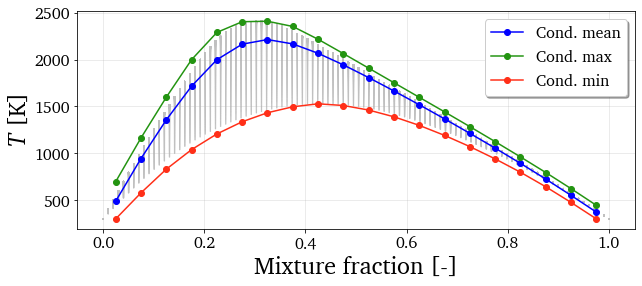

In [17]:
if save_plots: save_filename = '../images/conditional-statistics.svg'
plt = preprocess.plot_conditional_statistics(X[:,0], Z, k=20, x_label='Mixture fraction [-]', y_label='$T$ [K]', color='#c0c0c0', statistics_to_plot=['mean', 'max', 'min'], figure_size=(10,4), save_filename=save_filename)

Note, that the original data set that is plotted in the backround can be colored using any vector variable:

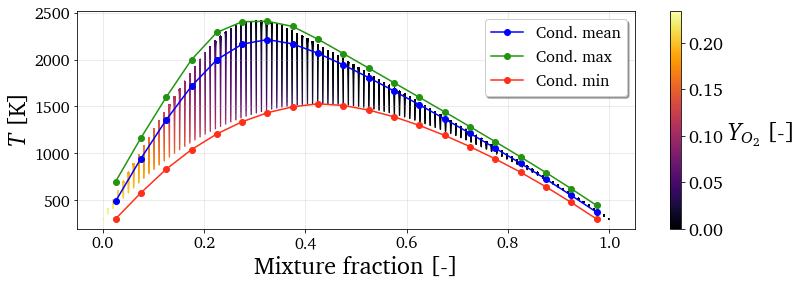

In [18]:
if save_plots: save_filename = '../images/conditional-statistics-colored.svg'
plt = preprocess.plot_conditional_statistics(X[:,0], Z, k=20, statistics_to_plot=['mean', 'max', 'min'], x_label='Mixture fraction [-]', y_label='$T$ [K]', color=X[:,2], color_map='inferno', colorbar_label='$Y_{O_2}$ [-]', figure_size=(12.5,4), save_filename=save_filename)

***
<a id='outlier_detection'></a>
## Multivariate outlier detection

[**↑ Go to the top**](#top-page)

Generate a two-dimensional data set with artificial outliers:

In [19]:
N = 2000
mean = [3, 3]
covariance = [[1, 0.2], [0.2, 1]]
x_data, y_data = np.random.multivariate_normal(mean, covariance, N).T

N_outliers = 20
mean_outliers = [7, 10]
covariance_outliers = [[0.2, .1], [.1, 0.2]]
x_outliers, y_outliers = np.random.multivariate_normal(mean_outliers, covariance_outliers, N_outliers).T

idx = np.zeros((N+N_outliers,))
x = np.vstack((x_data[:,np.newaxis], x_outliers[:,np.newaxis]))
y = np.vstack((y_data[:,np.newaxis], y_outliers[:,np.newaxis]))
X = np.hstack((x, y))

(n_observations, n_variables) = np.shape(X)

Visualize the data set and outliers using the `preprocess.plot_2d_clustering` function. Cluster `"0"` will be the data set and cluster `"1"` will be the outliers:

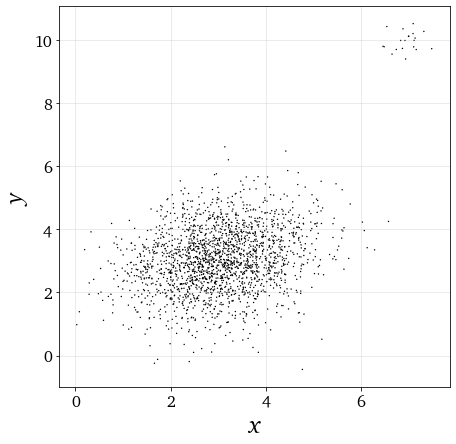

In [20]:
if save_plots: save_filename = '../images/data-manipulation-initial-data.svg'
plt = reduction.plot_2d_manifold(x, y, color='k', x_label='$x$', y_label='$y$', colorbar_label=None, title=None, save_filename=save_filename)

### Find multivariate outliers using `MULTIVARIATE TRIMMING` option

In [21]:
(idx_outliers_removed, idx_outliers) = preprocess.outlier_detection(X, scaling='auto', method='MULTIVARIATE TRIMMING', trimming_threshold=0.6, verbose=True)

Number of observations classified as outliers: 21


We are going to visualize how the algorithm classified the data into outliers/not-outliers. We begin by generating the new cluster classification vector, where the cluster $k_0$ will be non-outliers and cluster $k_1$ will be outliers:

In [22]:
idx_new = np.zeros((n_observations,))
for i in range(0, n_observations):
    if i in idx_outliers:
        idx_new[i] = 1
        
idx_new = idx_new.astype(int)

We can plot the partitioning:

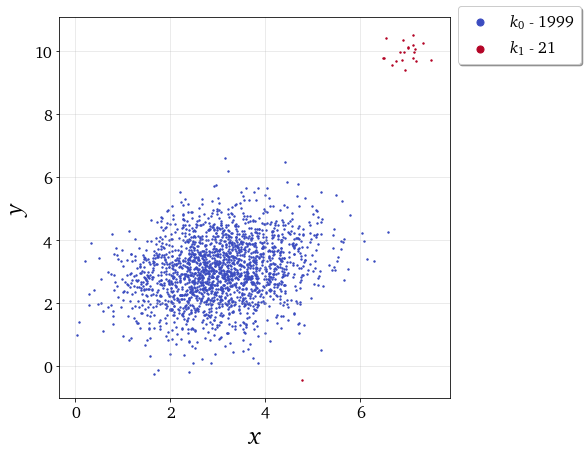

In [23]:
if save_plots: save_filename = '../images/data-manipulation-outliers-multivariate-trimming-60.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_new, x_label='$x$', y_label='$y$', color_map='coolwarm', first_cluster_index_zero=True, grid_on=True, figure_size=(7, 7), title=None, save_filename=save_filename)

If the parameter `trimming_threshold` is decreased, we more points that are within the data cloud become classified as outliers:

In [24]:
(idx_outliers_removed, idx_outliers) = preprocess.outlier_detection(X, scaling='auto', method='MULTIVARIATE TRIMMING', trimming_threshold=0.3, verbose=True)

Number of observations classified as outliers: 206


In [25]:
idx_new = np.zeros((n_observations,))
for i in range(0, n_observations):
    if i in idx_outliers:
        idx_new[i] = 1
        
idx_new = idx_new.astype(int)

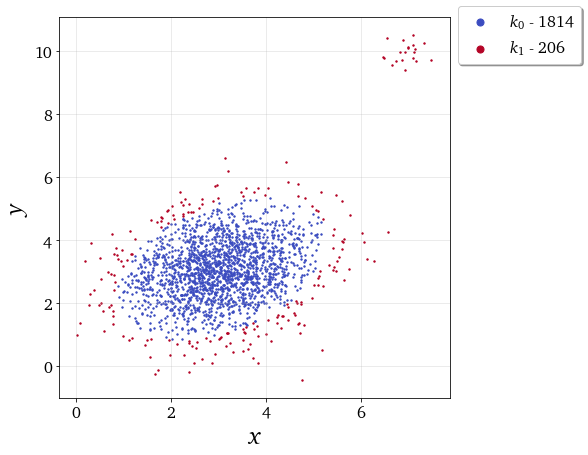

In [26]:
if save_plots: save_filename = '../images/data-manipulation-outliers-multivariate-trimming-30.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_new, x_label='$x$', y_label='$y$', color_map='coolwarm', first_cluster_index_zero=True, grid_on=True, figure_size=(7, 7), title=None, save_filename=save_filename)

### Find multivariate outliers using `PC CLASSIFIER` option

In [27]:
(idx_outliers_removed, idx_outliers) = preprocess.outlier_detection(X, scaling='auto', method='PC CLASSIFIER', quantile_threshold=0.9899, verbose=True)

Major components that will be selected are: 1
Minor components that will be selected are: 2
Number of observations classified as outliers: 41


In [28]:
idx_new = np.zeros((n_observations,))
for i in range(0, n_observations):
    if i in idx_outliers:
        idx_new[i] = 1
        
idx_new = idx_new.astype(int)

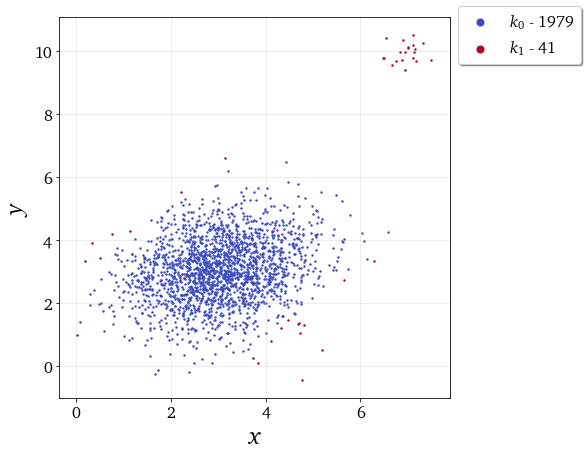

In [29]:
if save_plots: save_filename = '../images/data-manipulation-outliers-pc-classifier.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_new, x_label='$x$', y_label='$y$', color_map='coolwarm', first_cluster_index_zero=True, grid_on=True, figure_size=(7, 7), title=None, save_filename=save_filename)

***
<a id='kernel_density'></a>
## Kernel density weighting

[**↑ Go to the top**](#top-page)

In this tutorial we reproduce results generated on a synthetic data set from the following paper:

> [Coussement, A., Gicquel, O., & Parente, A. (2012). Kernel density weighted principal component analysis of combustion processes. Combustion and flame, 159(9), 2844-2855.](https://www.sciencedirect.com/science/article/abs/pii/S001021801200123X)

We begin by generating a synthetic data set:

In [30]:
n_observations = 2021
x1 = np.zeros((n_observations,1))
x2 = np.zeros((n_observations,1))

for i in range(0,n_observations):
    
    R = np.random.rand()

    if i <= 999:
        
        x1[i] = -1 + 20*R
        x2[i] = 5*x1[i] + 100*R
 
    if i >= 1000 and i <= 1020:
        
        x1[i] = 420 + 8*(i+1 - 1001)
        x2[i] = 5000/200 * (x1[i] - 400) + 500*R

    if i >= 1021 and i <= 2020:
        
        x1[i] = 1000 + 20*R
        x2[i] = 5*x1[i] + 100*R

X = np.hstack((x1, x2))

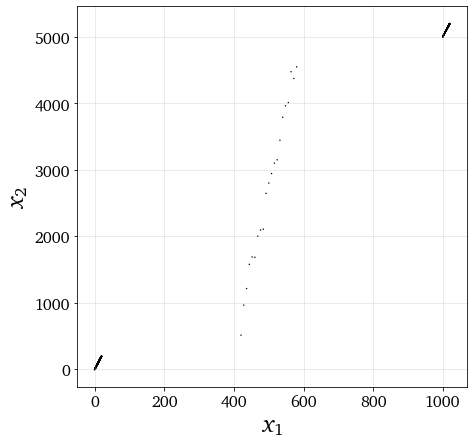

In [31]:
if save_plots: save_filename = '../images/kernel-density-original-data.svg'
plt = reduction.plot_2d_manifold(x1, x2, x_label='$x_1$', y_label='$x_2$', save_filename=save_filename)

We will also define a function that will create parity plots of the reconstructed data set:

### Reconstructing the data set without weighting

We will first demonstrate how the data set is reconstructed using only the first Principal Component obtained on the unweighted data set.

In [32]:
pca = PCA(X, scaling='auto', n_components=1)
PCs = pca.transform(X)
X_rec = pca.reconstruct(PCs)

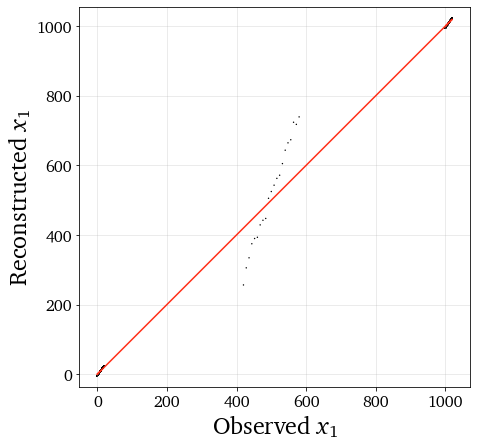

In [33]:
if save_plots: save_filename = '../images/kernel-density-original-x1.svg'
plt = reduction.plot_parity(X[:,0], X_rec[:,0], x_label='Observed $x_1$', y_label='Reconstructed $x_1$', save_filename=save_filename)

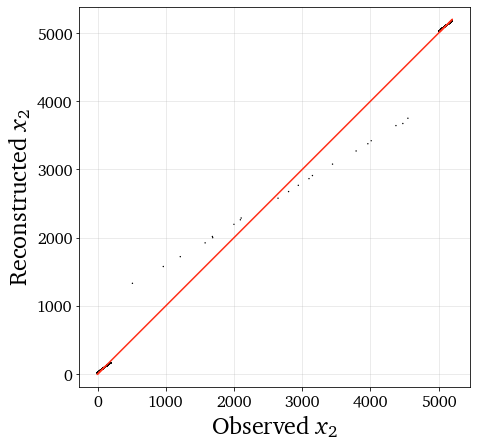

In [34]:
if save_plots: save_filename = '../images/kernel-density-original-x2.svg'
plt = reduction.plot_parity(X[:,1], X_rec[:,1], x_label='Observed $x_2$', y_label='Reconstructed $x_2$', save_filename=save_filename)

### Single-variable case

We first compute weights using a single variable as the conditioning variable:

In [35]:
%time kernd_single = KernelDensity(pca.X_cs, pca.X_cs[:,0], verbose=True)

Single-variable case will be applied.
CPU times: user 19 s, sys: 76.2 ms, total: 19.1 s
Wall time: 19.2 s


Obtain data set weighted by the computed weights:

In [36]:
X_weighted_single = kernd_single.X_weighted

Weights vector $\mathbf{W_c}$ can also be obtained as the class attribute:

In [37]:
single_weights = kernd_single.weights

Perform PCA on the weighted data set:

In [38]:
pca_single = PCA(X_weighted_single, 'none', n_components=1, nocenter=True)
PCs_single = pca_single.transform(pca.X_cs)
X_rec_single = pca_single.reconstruct(PCs_single)
X_rec_single = (X_rec_single * pca.X_scale) + pca.X_center

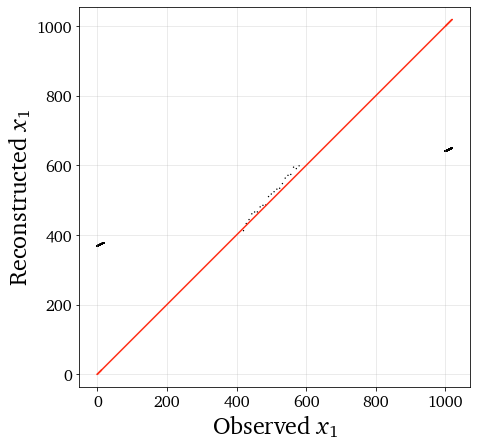

In [39]:
if save_plots: save_filename = '../images/kernel-density-single-x1.svg'
plt = reduction.plot_parity(X[:,0], X_rec_single[:,0], x_label='Observed $x_1$', y_label='Reconstructed $x_1$', save_filename=save_filename)

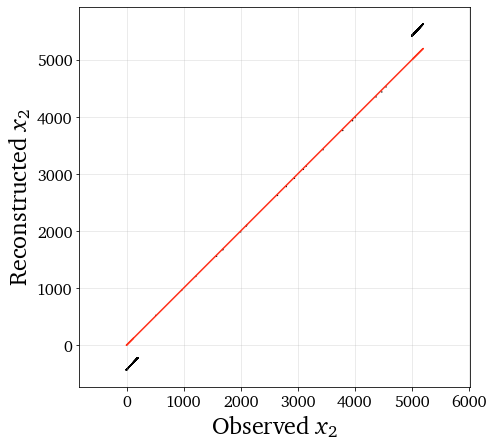

In [40]:
if save_plots: save_filename = '../images/kernel-density-single-x2.svg'
plt = reduction.plot_parity(X[:,1], X_rec_single[:,1], x_label='Observed $x_2$', y_label='Reconstructed $x_2$', save_filename=save_filename)

### Multi-variable case:

In [41]:
%time kernd_multi = KernelDensity(pca.X_cs, pca.X_cs, verbose=True)

Multi-variable case will be applied.
CPU times: user 37.8 s, sys: 149 ms, total: 37.9 s
Wall time: 38.2 s


Obtain data set weighted by the computed weights:

In [42]:
X_weighted_multi = kernd_multi.X_weighted

Weights vector $\mathbf{W_c}$ can also be obtained as the class attribute:

In [43]:
multi_weights = kernd_multi.weights

Perform PCA on the weighted data set:

In [44]:
pca_multi = PCA(X_weighted_multi, 'none', n_components=1)
PCs_multi = pca_multi.transform(pca.X_cs)
X_rec_multi = pca_multi.reconstruct(PCs_multi)
X_rec_multi = (X_rec_multi * pca.X_scale) + pca.X_center

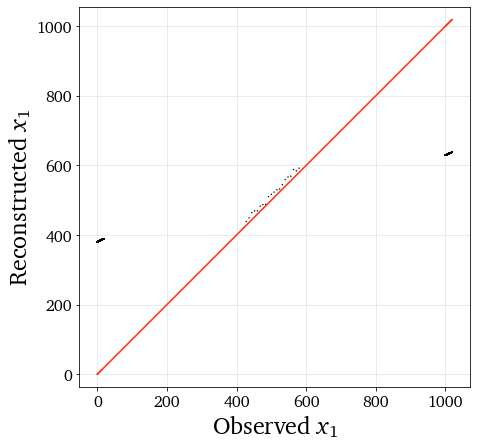

In [45]:
if save_plots: save_filename = '../images/kernel-density-multi-x1.svg'
plt = reduction.plot_parity(X[:,0], X_rec_multi[:,0], x_label='Observed $x_1$', y_label='Reconstructed $x_1$', save_filename=save_filename)

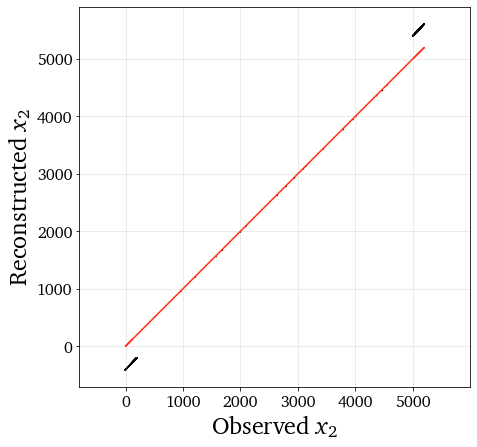

In [46]:
if save_plots: save_filename = '../images/kernel-density-multi-x2.svg'
plt = reduction.plot_parity(X[:,1], X_rec_multi[:,1], x_label='Observed $x_2$', y_label='Reconstructed $x_2$', save_filename=save_filename)

<a id='references'></a>
***

## References

[**↑ Go to the top**](#top-page)

> [[1]](#conditional_statistics) [M. A. Hansen, *Spitfire*, 2020](https://github.com/sandialabs/Spitfire)
> 
> [[2]](#conditional_statistics) E. R. Hawkes, R. Sankaran, J. C. Sutherland, J. H. Chen, *Scalar mixing in direct numerical simulations of temporally evolving plane jet flames with skeletal co/h2 kinetics*, Proceedings of the combustion institute 31 (1) (2007) 1633–1640

***